## Preprocessing:

In [1]:
import pandas as pd

df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
import numpy as np
df.replace('?', np.nan, inplace=True)

In [3]:
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis = 1)
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   admission_type_id         98053 non-null  int64 
 6   discharge_disposition_id  98053 non-null  int64 
 7   admission_source_id       98053 non-null  int64 
 8   time_in_hospital          98053 non-null  int64 
 9   num_lab_procedures        98053 non-null  int64 
 10  num_procedures            98053 non-null  int64 
 11  num_medications           98053 non-null  int64 
 12  number_outpatient         98053 non-null  int64 
 13  number_emergency          98053 non-null  int64 
 14  number_inpatient          

In [4]:
import numpy as np
df.drop_duplicates()
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [5]:
from sklearn.preprocessing import LabelEncoder
df_cleaned['race'].unique()
encoder = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')
# Fit and transform the 'Category' column
df_cleaned['race_encode'] = encoder.fit_transform(df_cleaned['race']) + 1
df_cleaned['gender_encode'] = encoder.fit_transform(df_cleaned['gender'])
df_cleaned['age_encode'] = encoder.fit_transform(df_cleaned['age'])
df_cleaned.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,race_encode,gender_encode,age_encode
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Ch,Yes,>30,3,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,Yes,NO,1,0,2
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Ch,Yes,NO,3,1,3
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Ch,Yes,NO,3,1,4
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,Yes,>30,3,1,5


In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

encoder = LabelEncoder()

# Apply label encoding to columns 10 to 20
for col in df.columns[18:46]:  # Columns 10 to 20 (0-based index)
    df_cleaned[col + '_encoded'] = encoder.fit_transform(df_cleaned[col]) + 1
df_cleaned.drop(df_cleaned.columns[18:46], axis=1, inplace=True)

df_cleaned.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton_encoded,insulin_encoded,glyburide-metformin_encoded,glipizide-metformin_encoded,glimepiride-pioglitazone_encoded,metformin-rosiglitazone_encoded,metformin-pioglitazone_encoded,change_encoded,diabetesMed_encoded,readmitted_encoded
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,1,4,2,1,1,1,1,1,2,2
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,1,2,2,1,1,1,1,2,2,3
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,1,4,2,1,1,1,1,1,2,3
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,1,3,2,1,1,1,1,1,2,3
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,1,3,2,1,1,1,1,2,2,2


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   encounter_id                      98053 non-null  int64 
 1   patient_nbr                       98053 non-null  int64 
 2   race                              98053 non-null  object
 3   gender                            98053 non-null  object
 4   age                               98053 non-null  object
 5   admission_type_id                 98053 non-null  int64 
 6   discharge_disposition_id          98053 non-null  int64 
 7   admission_source_id               98053 non-null  int64 
 8   time_in_hospital                  98053 non-null  int64 
 9   num_lab_procedures                98053 non-null  int64 
 10  num_procedures                    98053 non-null  int64 
 11  num_medications                   98053 non-null  int64 
 12  number_outpatient     

In [8]:
count_textual1 = df_cleaned['diag_1'].str.contains('V', 'E', na=False).sum()
count_textual2 = df_cleaned['diag_2'].str.contains('V', 'E', na=False).sum()
count_textual3 = df_cleaned['diag_3'].str.contains('V', 'E', na=False).sum()
print(count_textual1)
print(count_textual2)
print(count_textual3)

1600
1735
3757


In [9]:
df_cleaned = df_cleaned[~df_cleaned['diag_1'].str.contains('V' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_1'].str.contains('E' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_2'].str.contains('V' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_2'].str.contains('E' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_3'].str.contains('V' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_3'].str.contains('E' ,na=False)]


In [10]:
df_cleaned['diag_1'].unique()

array(['276', '8', '197', '414', '428', '398', '434', '250.7', '157',
       '518', '999', '410', '682', '402', '189', '786', '427', '996',
       '277', '584', '462', '473', '411', '174', '486', '998', '511',
       '432', '626', '295', '196', '250.6', '182', '845', '423', '808',
       '722', '784', '707', '440', '151', '715', '997', '198', '564',
       '403', '38', '590', '578', '250.32', '250.4', '569', '536', '255',
       '599', '558', '574', '491', '560', '244', '250.03', '577', '730',
       '188', '250.8', '332', '562', '291', '296', '510', '401', '263',
       '438', '70', '642', '571', '738', '593', '618', '250.42', '807',
       '456', '446', '572', '575', '250.41', '250.02', '820', '515',
       '780', '250.22', '995', '235', '250.82', '721', '787', '556',
       '162', '724', '282', '250.83', '514', '250.13', '281', '530',
       '466', '435', '250.12', '789', '648', '566', '822', '191', '557',
       '733', '455', '711', '482', '202', '493', '280', '553', '154',
       

In [11]:
# Assuming your DataFrame is called 'df'
df_cleaned['diag_1'] = df_cleaned['diag_1'].astype(float)
df_cleaned['diag_2'] = df_cleaned['diag_2'].astype(float)
df_cleaned['diag_3'] = df_cleaned['diag_3'].astype(float)
df_cleaned['admission_type_id'] = df_cleaned['admission_type_id'].astype(int)
df_cleaned['discharge_disposition_id'] = df_cleaned['discharge_disposition_id'].astype(int)
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].astype(int)

In [12]:
df_cleaned.drop(['race', 'gender', 'age'], axis=1, inplace=True)
df_cleaned.drop(['encounter_id'], axis=1, inplace=True)
df_cleaned.drop(['patient_nbr'], axis=1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89782 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   admission_type_id                 89782 non-null  int64  
 1   discharge_disposition_id          89782 non-null  int64  
 2   admission_source_id               89782 non-null  int64  
 3   time_in_hospital                  89782 non-null  int64  
 4   num_lab_procedures                89782 non-null  int64  
 5   num_procedures                    89782 non-null  int64  
 6   num_medications                   89782 non-null  int64  
 7   number_outpatient                 89782 non-null  int64  
 8   number_emergency                  89782 non-null  int64  
 9   number_inpatient                  89782 non-null  int64  
 10  diag_1                            89782 non-null  float64
 11  diag_2                            89782 non-null  float64
 12  diag_3  

In [13]:
df_cleaned['readmitted_encoded'].unique()

array([2, 3, 1])

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
df2 = df_cleaned.drop(['readmitted_encoded'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89782 entries, 1 to 101765
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   admission_type_id                 89782 non-null  int64  
 1   discharge_disposition_id          89782 non-null  int64  
 2   admission_source_id               89782 non-null  int64  
 3   time_in_hospital                  89782 non-null  int64  
 4   num_lab_procedures                89782 non-null  int64  
 5   num_procedures                    89782 non-null  int64  
 6   num_medications                   89782 non-null  int64  
 7   number_outpatient                 89782 non-null  int64  
 8   number_emergency                  89782 non-null  int64  
 9   number_inpatient                  89782 non-null  int64  
 10  diag_1                            89782 non-null  float64
 11  diag_2                            89782 non-null  float64
 12  diag_3  

## PCA:

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [17]:
X_scaled.shape

(89782, 41)

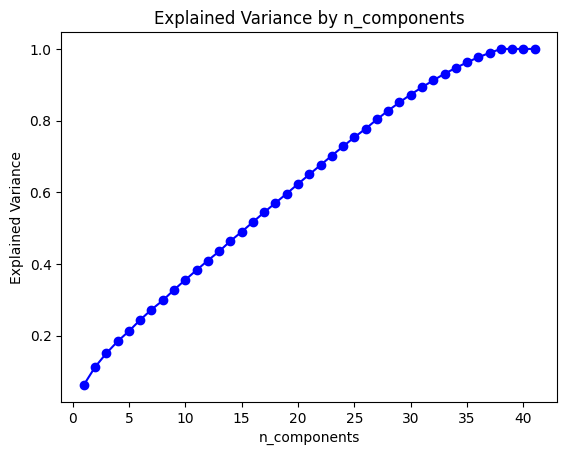

In [18]:
n_components_range = np.arange(1, X_scaled.shape[1] + 1)

explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(X_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'bo-')
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by n_components')
plt.show()

In [18]:
pca = PCA(n_components=0.7) 
principal_components = pca.fit_transform(X_scaled)
print(pca.n_components_)

23


In [19]:
df = pd.read_csv('diabetic_data.csv')
target = df['readmitted'] 
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
#df_pca['target'] = target
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,0.459377,-1.115064,0.849130,1.824412,-1.736591,1.291404,-0.660841,0.521422,0.052218,1.106812,...,0.110767,-0.256614,0.007845,-0.044898,0.140759,-0.254797,-0.095119,-0.043261,-0.538513,0.513677
1,0.139858,-1.340413,0.345493,1.727842,-1.604557,0.819386,-1.094423,-0.623506,0.720069,2.026434,...,0.179227,0.153351,-0.009053,-0.088859,0.194173,-0.262744,0.103632,0.161434,-0.226344,0.619510
2,-0.764651,-2.468035,0.331602,1.051203,-1.443425,1.433038,-2.632399,-0.507327,0.773048,0.217014,...,-0.056807,0.187736,-0.072935,-0.149632,0.059029,-0.016051,0.137686,0.153603,-0.085464,0.263824
3,-0.071180,0.372001,-1.491417,1.799423,-0.439995,-0.986116,-0.186860,-0.551697,0.252233,0.777429,...,-0.214496,0.032252,-0.095214,0.074921,0.171626,-0.031543,0.106350,-0.135383,-0.131022,0.438834
4,-0.214558,0.215714,0.012950,-1.136274,-1.234392,1.523098,0.978506,-0.941017,1.302006,0.258371,...,-0.311823,-0.090281,-0.175625,0.055231,0.032282,0.028541,0.099241,0.160432,0.124911,-0.064686


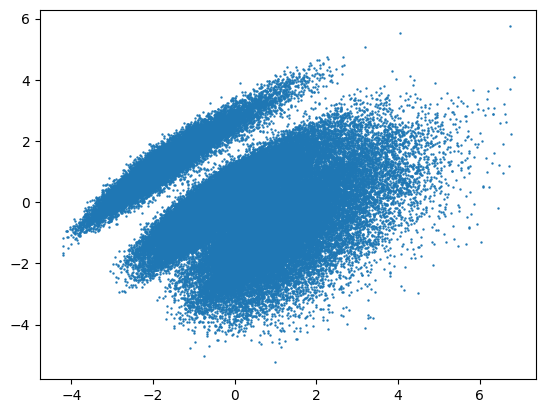

In [20]:
x1 = df_pca['PC1']
x2 = df_pca['PC2']
plt.scatter(x1,x2, s=0.5)

## Unsupervised Learning:

### Silhouette Method:

In [22]:
# d=23:

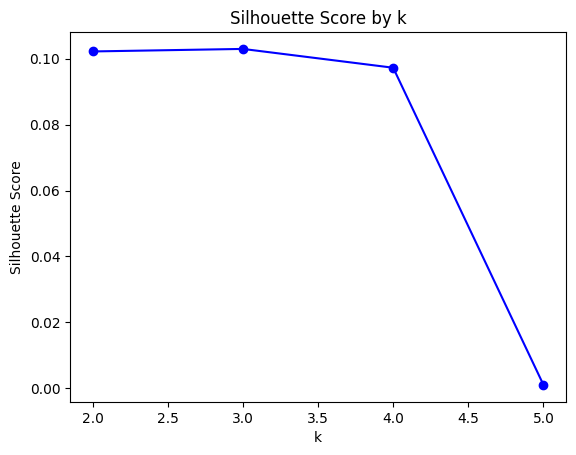

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Assuming df_pca is your dataframe containing the PCA-transformed data

# Define the range of k values
k_values = range(2, 6)  # Change the range as per your requirement

# Initialize an empty list to store the Silhouette Scores
silhouette_scores = []

# Iterate over the k values
for k in k_values:
    # Create a MiniBatchKMeans clustering model with the current k value
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_pca)
    
    # Calculate the Silhouette Score and append it to the list
    silhouette_scores.append(silhouette_score(df_pca, clusters))

# Plotting the Silhouette Scores versus k values
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.show()

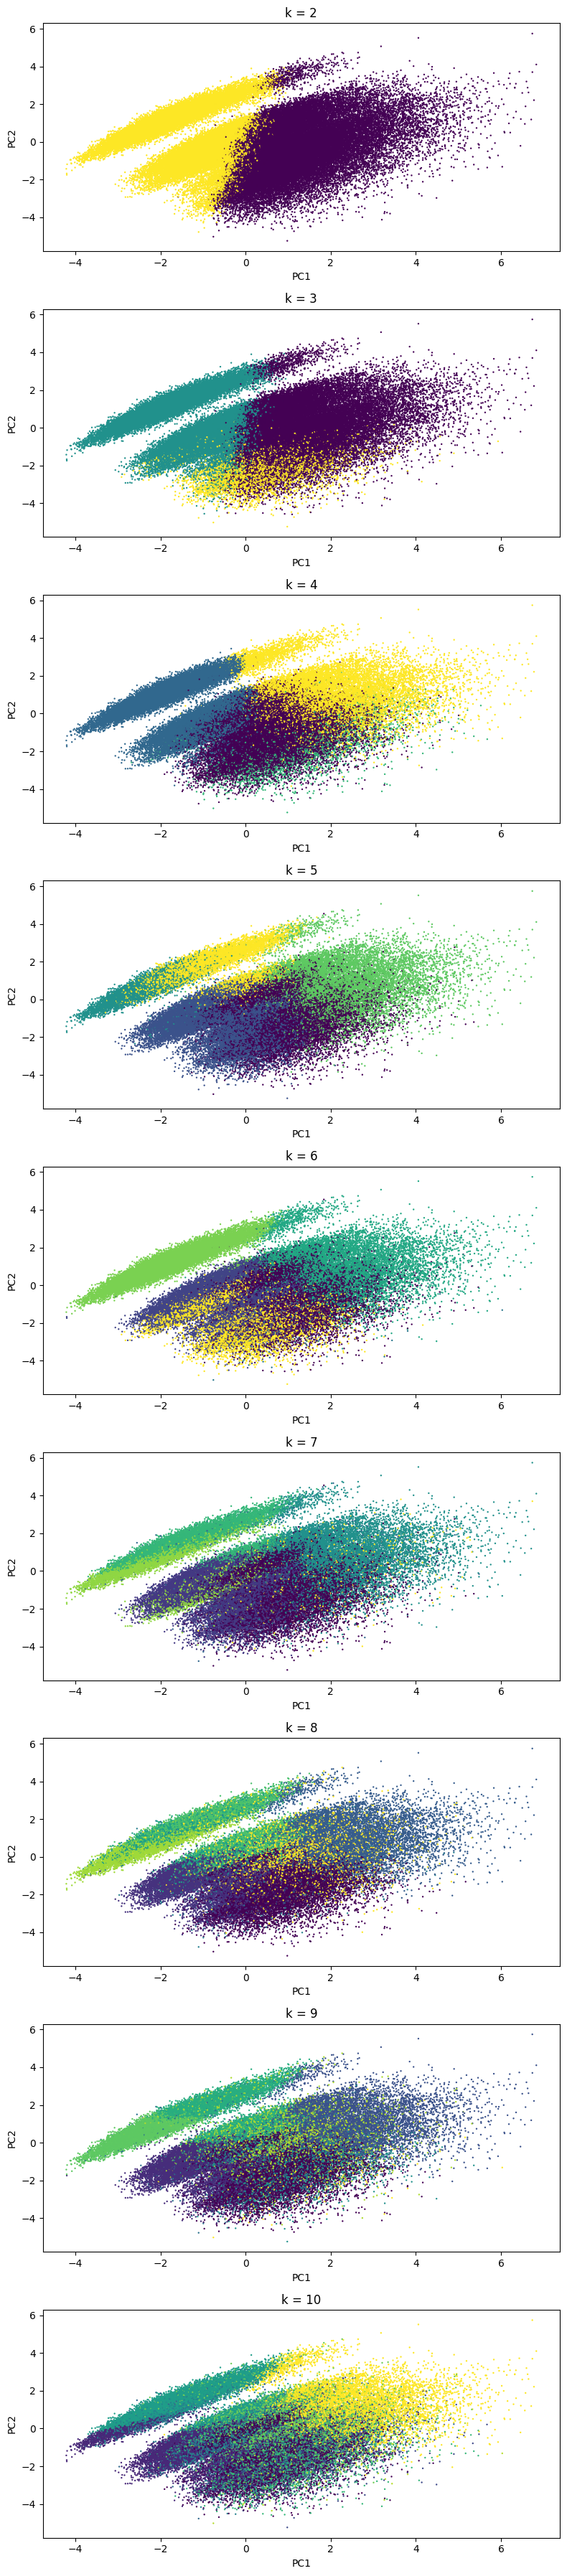

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Assuming df_pca is your dataframe containing the PCA-transformed data

# Convert df_pca to a NumPy array
df_pca_array = df_pca.values

# Define the range of k values
k_values = range(2, 11)  # Change the range as per your requirement

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(k_values), ncols=1, figsize=(8, len(k_values) * 4))

# Iterate over the k values
for i, k in enumerate(k_values):
    # Create a MiniBatchKMeans clustering model with the current k value
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_pca_array)
    
    # Plot the scatter plot for the current k value
    ax = axes[i]
    ax.scatter(df_pca_array[:, 0], df_pca_array[:, 1], c=clusters, cmap='viridis', s = 0.5)
    ax.set_title(f'k = {k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()

### K Means:

In [21]:
from sklearn.cluster import MiniBatchKMeans

# Assuming X is your data

# Create a MiniBatchKMeans clustering model with k=3
kmeans = MiniBatchKMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(df_pca)
# Get the cluster labels for each data point
labels_KMeans = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:", labels_KMeans)
print("Cluster Centers:", centers)

Cluster Labels: [0 0 2 ... 0 0 1]
Cluster Centers: [[ 1.22749503e+00 -5.68691941e-02  1.65416449e-01 -2.48045767e-02
  -8.06708750e-02  7.50813773e-02 -9.71596870e-02 -8.17941503e-02
  -8.06235085e-02 -3.94360530e-02  4.37597973e-04 -7.77741913e-02
   3.88267012e-03  3.72492016e-02 -3.02887270e-02 -3.32737699e-02
   5.92221831e-03 -9.73156578e-03  1.95102984e-03  3.15913932e-02
   2.44450976e-02  3.80063716e-02 -4.79419567e-02]
 [-1.17503583e+00  2.58786470e-01 -1.43662566e-01  6.79851102e-02
   7.28578689e-02 -8.98167289e-02 -2.25825844e-02 -1.39987734e-02
  -2.91212409e-02  5.86822618e-02  4.62428998e-02  5.86107209e-02
  -3.49603785e-02 -1.59862631e-02 -8.35531371e-03  1.05425091e-02
  -3.14882618e-03  1.55029214e-02 -1.62880830e-02 -1.15348508e-02
  -1.13602012e-02 -4.42738957e-02  3.67359004e-02]
 [-1.49245014e-01 -2.60520005e+00 -1.02739516e-02 -3.37938383e-01
  -4.94680899e-01  6.27174808e-01  7.91211115e-01  1.00007842e+00
   1.68566497e+00 -2.59719525e-01 -1.29284029e+00  3.99

In [22]:
from collections import Counter

# Assuming labels is the list of cluster labels obtained from DBSCAN

# Count the occurrences of each class
label_counts = Counter(labels_KMeans)

# Print the class counts
for label, count in label_counts.items():
    print(f"Class {label}: {count} data points")

Class 0: 39942 data points
Class 2: 6454 data points
Class 1: 43386 data points


### DBSCAN:

In [18]:
pca = PCA(n_components=0.1) 
principal_components = pca.fit_transform(X_scaled)
print(pca.n_components_)
df = pd.read_csv('diabetic_data.csv')
target = df['readmitted'] 
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
#df_pca['target'] = target
df_pca.head()

2


,PC1,PC2
0,0.459377,-1.115064
1,0.139858,-1.340413
2,-0.764651,-2.468035
3,-0.071180,0.372001
4,-0.214558,0.215714


In [19]:
df2 = df_pca.sample(frac=0.05, replace=True, random_state=1)
df2.head()

,PC1,PC2
77708,-0.928371,0.993259
5192,-1.056244,-1.114538
50057,-1.944764,1.128149
73349,-0.956246,0.114777
21440,-2.666882,0.767907


In [20]:
df2.sort_index()
df2.to_csv('diab2.csv', index=False)

In [21]:
df3 = pd.read_csv('diab2.csv')
df3.head()

,PC1,PC2
0,-0.928371,0.993259
1,-1.056244,-1.114538
2,-1.944764,1.128149
3,-0.956246,0.114777
4,-2.666882,0.767907


In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.1, min_samples=100)
labels = dbscan.fit_predict(df_pca)
score = silhouette_score(df_pca, labels)
print(score)


-0.05232341139871563


In [27]:
print(len(np.unique(labels)))
# for i in range(1,10000):
#     print(labels[i])

5


In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


smp = [100, 200, 500, 800]
epss = [0.1, 0.3, 0.5, 0.9]
# Iterate over different parameters
best_score = -1
best_params = None
for min_samples in smp:
    for eps in epss:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_pca)
        if(len(np.unique(labels)) > 1):
            score = silhouette_score(df_pca, labels)
        print(min_samples)
        print(eps)
        if score > best_score:
            print(score)
            best_score = score
            best_params = {'min_samples': min_samples, 'eps': eps}

print(f"Best silhouette score: {best_score:.2f}")
print(f"Optimal parameters: {best_params}")


100
0.1
-0.05232341139871563
100
0.3
0.4550476110268842
100
0.5
0.5227377761506106
100
0.9
0.6015472565525302
200
0.1
200
0.3
200
0.5
200
0.9
500
0.1
500
0.3


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


smp = [400, 800, 1500, 2800]
epss = [1.2, 2.3, 3.5, 4.4]
# Iterate over different parameters
best_score = -1
best_params = None
for min_samples in smp:
    for eps in epss:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_pca)
        if(len(np.unique(labels)) > 1):
            score = silhouette_score(df_pca, labels)
        print(min_samples)
        print(eps)
        if score > best_score:
            print(score)
            best_score = score
            best_params = {'min_samples': min_samples, 'eps': eps}

print(f"Best silhouette score: {best_score:.2f}")
print(f"Optimal parameters: {best_params}")


400
1.2
-0.1862155238735527
400
2.3
0.04251118523578693
400
3.5
0.3805416052148831


Exception ignored in: Exception ignored in: 'sklearn.metrics._pairwise_distances_reduction._radius_neighbors.EuclideanRadiusNeighbors64._compute_and_reduce_distances_on_chunks'
Exception ignored in: 'sklearn.metrics._pairwise_distances_reduction._radius_neighbors.EuclideanRadiusNeighbors64._compute_and_reduce_distances_on_chunks'
Exception ignored in: 'sklearn.metrics._pairwise_distances_reduction._radius_neighbors.EuclideanRadiusNeighbors64._compute_and_reduce_distances_on_chunks'
Exception ignored in: 'sklearn.metrics._pairwise_distances_reduction._radius_neighbors.EuclideanRadiusNeighbors64._compute_and_reduce_distances_on_chunks'
'sklearn.metrics._pairwise_distances_reduction._radius_neighbors.EuclideanRadiusNeighbors64._compute_and_reduce_distances_on_chunks'


In [59]:

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

distances = np.sort(distances, axis=0)
distances = distances[88000:,1]

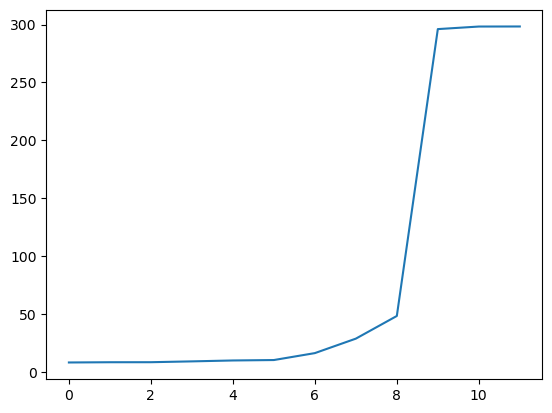

In [63]:
plt.plot(distances[1770:])

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler



# Standardize the data
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=2, min_samples=400)

# Fit the model to the standardized data
dbscan.fit(df_pca_scaled)

# Get the cluster labels for each data point (-1 represents noise/outliers)
labels_DBSCAN = dbscan.labels_

# Add the cluster labels as a new column in the dataframe

# Print the dataframe with the cluster labels
# print(labels_DBSCAN)


In [ ]:
from collections import Counter

# Assuming labels is the list of cluster labels obtained from DBSCAN

# Count the occurrences of each class
label_counts = Counter(labels_DBSCAN)

# Print the class counts
for label, count in label_counts.items():
    print(f"Class {label}: {count} data points")

In [35]:

print((np.unique(labels_DBSCAN)))

[0]


In [36]:
df_pca['dbscan'] = labels_DBSCAN
df_pca['kmeans'] = labels_KMeans
diff = (labels_DBSCAN+1) - labels_KMeans
# for i in range(0, len(diff)):
#     print(diff[i])
df_pca.to_csv('diab_label.csv', index=False)

In [37]:
labels = Counter(diff)

# Print the class counts
for label, count in labels.items():
    print(f"Class {label}: {count} data points")

Class 1: 39942 data points
Class -1: 6454 data points
Class 0: 43386 data points


In [38]:
from collections import Counter

# Assuming labels is the list of cluster labels obtained from DBSCAN

# Count the occurrences of each class
label_counts = Counter(labels_DBSCAN)

# Print the class counts
for label, count in label_counts.items():
    print(f"Class {label}: {count} data points")

Class 0: 89782 data points


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter


eps_values = [2]
min_samples_values = [400, 500, 600, 700, 800]

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_pca_scaled)
        labels_DBSCAN = dbscan.labels_

        label_counts = Counter(labels_DBSCAN)

        print(f"Results for eps={eps} and min_samples={min_samples}:")
        for label, count in label_counts.items():
            print(f"Class {label}: {count} data points")

Results for eps=2 and min_samples=400:
Class 0: 89782 data points
Results for eps=2 and min_samples=500:
Class 0: 89782 data points
Results for eps=2 and min_samples=600:
Class 0: 89782 data points
Results for eps=2 and min_samples=700:
Class 0: 89782 data points
Results for eps=2 and min_samples=800:
Class 0: 89782 data points


In [23]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter


eps_values = [3]
min_samples_values = [ 500, 600, 700, 800]

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_pca_scaled)
        labels_DBSCAN = dbscan.labels_

        label_counts = Counter(labels_DBSCAN)

        print(f"Results for eps={eps} and min_samples={min_samples}:")
        for label, count in label_counts.items():
            print(f"Class {label}: {count} data points")

Results for eps=3 and min_samples=500:
Class 0: 85120 data points
Class -1: 3752 data points
Class 1: 910 data points
Results for eps=3 and min_samples=600:
Class 0: 84989 data points
Class -1: 4024 data points
Class 1: 769 data points
Results for eps=3 and min_samples=700:
Class 0: 84895 data points
Class -1: 4887 data points
Results for eps=3 and min_samples=800:
Class 0: 84783 data points
Class -1: 4999 data points


In [22]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter


eps_values = [4]
min_samples_values = [ 500, 600, 700, 800]

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_pca_scaled)
        labels_DBSCAN = dbscan.labels_

        label_counts = Counter(labels_DBSCAN)

        print(f"Results for eps={eps} and min_samples={min_samples}:")
        for label, count in label_counts.items():
            print(f"Class {label}: {count} data points")

Results for eps=4 and min_samples=500:
Class 0: 86573 data points
Class -1: 1482 data points
Class 1: 1223 data points
Class 2: 504 data points
Results for eps=4 and min_samples=600:
Class 0: 86550 data points
Class -1: 2018 data points
Class 1: 1214 data points
Results for eps=4 and min_samples=700:
Class 0: 86539 data points
Class -1: 2041 data points
Class 1: 1202 data points
Results for eps=4 and min_samples=800:
Class 0: 86530 data points
Class -1: 2066 data points
Class 1: 1186 data points


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter


eps_values = [5]
min_samples_values = [700, 800, 900, 1000]

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_pca_scaled)
        labels_DBSCAN = dbscan.labels_

        label_counts = Counter(labels_DBSCAN)

        print(f"Results for eps={eps} and min_samples={min_samples}:")
        for label, count in label_counts.items():
            print(f"Class {label}: {count} data points")

For n_clusters = 2 The average silhouette_score is : 0.10165411735443983


InvalidIndexError: (slice(None, None, None), 0)

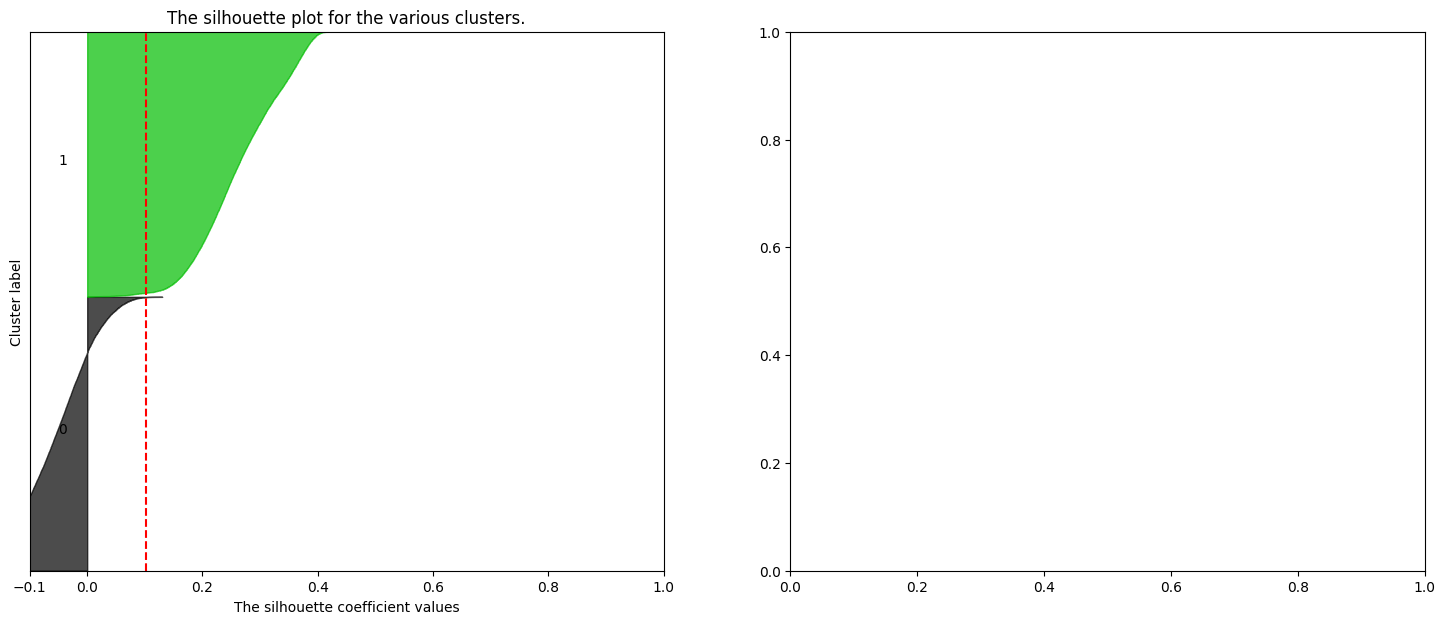

In [88]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
# Assuming you have a DataFrame 'df' with your data
# Replace 'features' with the actual features you're using for clustering

# K-Means
range_n_clusters = [2, 3]
X = df_pca
for n_clusters in range_n_clusters:
     # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Extract relevant columns
result_df = df[['id_encounter']]
result_df['kmean_label'] = best_kmeans.labels_
#result_df['dbscan_label'] = dbscan_labels

# Save to CSV
result_df.to_csv('cluster_results.csv', index=False)


## Questions:
1) First, cells with the value "?" They were converted to nan and then for each feature, depending on the number of nans, it was decided whether to remove the entire column or not. Then, features with categorical values were encoded so that they can be used in the next steps
2) 



5) Step 1: Calculate the average distance between each point in the data set and its 20 nearest neighbors (my selected MinPts value).
6) DBSCAN is better suited for datasets with irregular shapes or varying densities. DBSCAN is a density-based clustering algorithm, whereas K-Means is a centroid-based clustering algorithm. DBSCAN can discover clusters of arbitrary shapes, whereas K-Means assumes that the clusters are spherical.